In [36]:
import pandas as pd
import numpy as np
import seaborn as sns   
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import math

In [37]:
# Loading and inital view of the dataset

df = pd.read_csv('data/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
'''
PassengerId: Id of the passenger
Survived: 1 for alive, 0 dead
Pclass: 1 for first class, 2 for second class, and 3 for third class
Name: Name of the passenger
Sex: Gender of the passenger
Age: Age of the passenger
SibSp: Number of siblings onboard of passenger
Parch: Number of parents and childrens of the passenger onboard
Ticket: Ticket number of the passenger
Fare (in Euro): Price paid by the passenger for onboarding the titanic
Cabin: Cabin number of the passenger
Embarked: Which port did the passenger onboard the ship from.
'''

'\nPassengerId: Id of the passenger\nSurvived: 1 for alive, 0 dead\nPclass: 1 for first class, 2 for second class, and 3 for third class\nName: Name of the passenger\nSex: Gender of the passenger\nAge: Age of the passenger\nSibSp: Number of siblings onboard of passenger\nParch: Number of parents and childrens of the passenger onboard\nTicket: Ticket number of the passenger\nFare (in Euro): Price paid by the passenger for onboarding the titanic\nCabin: Cabin number of the passenger\nEmbarked: Which port did the passenger onboard the ship from.\n'

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
# Checking for null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
df.shape

(891, 12)

In [43]:
df[df['Cabin'] == 'B28']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [44]:
# Checked online to see which port was used for Cabin B28, and it was found to be 'C'
df.Embarked.unique()

# Setting 'NaN' to 'C' and mapping them to respective numeric values
df['Embarked'] = df['Embarked'].fillna('C')
df.Embarked.unique()
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df[df['Cabin'] == 'B28']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,1


In [45]:
# Checking for null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## Performing interpolation to fill the missing data for age

In [46]:
# Sorting and rounding age values
sorted_df = df.sort_values(by='Age')
sorted_df.head()

sorted_df['Age_rounded'] = sorted_df['Age'].round().astype('Int64')
sorted_df.Age_rounded.unique()

<IntegerArray>
[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,   12,
   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,   23,   24,   25,
   26,   27,   28,   29,   30,   31,   32,   33,   34,   35,   36,   37,   38,
   39,   40,   41,   42,   43,   44,   45,   46,   47,   48,   49,   50,   51,
   52,   53,   54,   55,   56,   57,   58,   59,   60,   61,   62,   63,   64,
   65,   66,   70,   71,   74,   80, <NA>]
Length: 72, dtype: Int64

In [47]:
sorted_df['Age_interpolate'] = sorted_df['Age_rounded'].interpolate()  # Default 'linear' interpolation
sorted_df['Age_interpolate'].unique()

<FloatingArray>
[ 0.0,  1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0,
 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0,
 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0,
 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0,
 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0,
 65.0, 66.0, 70.0, 71.0, 74.0, 80.0]
Length: 71, dtype: Float64

In [48]:
sorted_df.drop(['Age','Age_rounded'], axis = 1, inplace = True)
sorted_df['Age_interpolate'] = sorted_df['Age_interpolate'].round().astype('Int64')
sorted_df['Age_interpolate'].unique()

<IntegerArray>
[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 70, 71, 74, 80]
Length: 71, dtype: Int64

In [49]:
sorted_df.isna().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             0
Age_interpolate      0
dtype: int64

In [50]:
sorted_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_interpolate
803,804,1,3,"Thomas, Master. Assad Alexander",male,0,1,2625,8.5167,NaN,1,0
755,756,1,2,"Hamalainen, Master. Viljo",male,1,1,250649,14.5000,NaN,0,1
469,470,1,3,"Baclini, Miss. Helene Barbara",female,2,1,2666,19.2583,NaN,1,1
644,645,1,3,"Baclini, Miss. Eugenie",female,2,1,2666,19.2583,NaN,1,1
78,79,1,2,"Caldwell, Master. Alden Gates",male,0,2,248738,29.0000,NaN,0,1


## Processing 'Cabin'

In [51]:
# Interpolating 'Cabin' column
sorted_df.Cabin.unique()

array([nan, 'C22 C26', 'F4', 'G6', 'F2', 'A34', 'E121', 'B96 B98', 'B5',
       'D28', 'B79', 'B18', 'C65', 'C70', 'B20', 'B57 B59 B63 B66',
       'C62 C64', 'E68', 'B42', 'D47', 'D30', 'F G73', 'B49',
       'C23 C25 C27', 'D9', 'D26', 'B39', 'E33', 'C2', 'D36', 'D',
       'D10 D12', 'B86', 'F33', 'C90', 'B35', 'B58 B60', 'C54', 'E50',
       'C148', 'D49', 'C82', 'E8', 'E101', 'C52', 'A6', 'D6', 'E36',
       'B73', 'C111', 'B77', 'A24', 'C7', 'B71', 'D15', 'E10', 'B50',
       'B51 B53 B55', 'C78', 'D56', 'C99', 'B101', 'E24', 'C83', 'C93',
       'C123', 'E25', 'B22', 'C32', 'A10', 'C46', 'C118', 'D35', 'C91',
       'C45', 'B28', 'C85', 'E49', 'E44', 'C68', 'A36', 'E67', 'E34',
       'B94', 'C125', 'A31', 'E40', 'D19', 'F G63', 'B3', 'B4', 'B38',
       'T', 'C124', 'B82 B84', 'E31', 'D46', 'C110', 'E58', 'E63', 'C126',
       'A16', 'D33', 'E12', 'D17', 'C92', 'A20', 'C49', 'C86', 'E17',
       'D11', 'C104', 'B69', 'D20', 'C101', 'E46', 'C30', 'A26', 'C50',
       'A7', 'E77'

In [52]:
sorted_df['Cabin_Filled'] = sorted_df['Cabin'].fillna('Unknown')
sorted_df[sorted_df['Cabin_Filled'] == 'Unknown']

# Since most of the cabin's missing values are for third class, we can leave them as having no cabin as third class didn't have cabin.
sorted_df['Has_Cabin'] = sorted_df['Cabin_Filled'].apply(
    lambda x: 0 if x == 'Unknown' else 1
)
sorted_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_interpolate,Cabin_Filled,Has_Cabin
803,804,1,3,"Thomas, Master. Assad Alexander",male,0,1,2625,8.5167,NaN,1,0,Unknown,0
755,756,1,2,"Hamalainen, Master. Viljo",male,1,1,250649,14.5000,NaN,0,1,Unknown,0
469,470,1,3,"Baclini, Miss. Helene Barbara",female,2,1,2666,19.2583,NaN,1,1,Unknown,0
644,645,1,3,"Baclini, Miss. Eugenie",female,2,1,2666,19.2583,NaN,1,1,Unknown,0
78,79,1,2,"Caldwell, Master. Alden Gates",male,0,2,248738,29.0000,NaN,0,1,Unknown,0


In [53]:
# Dropping some features that seem irrelevant 
sorted_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin_Filled', 'Cabin'], axis = 1, inplace = True)
sorted_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_interpolate,Has_Cabin
803,1,3,male,0,1,8.5167,1,0,0
755,1,2,male,1,1,14.5000,0,1,0
469,1,3,female,2,1,19.2583,1,1,0
644,1,3,female,2,1,19.2583,1,1,0
78,1,2,male,0,2,29.0000,0,1,0


## Creating 'IsAlone' Column

In [54]:
sorted_df['Family_Size'] = sorted_df['SibSp'] + sorted_df['Parch'] + 1 # + 1 for the passenger themself
sorted_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_interpolate,Has_Cabin,Family_Size
803,1,3,male,0,1,8.5167,1,0,0,2
755,1,2,male,1,1,14.5000,0,1,0,3
469,1,3,female,2,1,19.2583,1,1,0,4
644,1,3,female,2,1,19.2583,1,1,0,4
78,1,2,male,0,2,29.0000,0,1,0,3


In [55]:
sorted_df['IsAlone'] = sorted_df['Family_Size'].apply(
    lambda x: 1 if x == 1 else 0 
)
sorted_df[sorted_df['IsAlone'] == 1]

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_interpolate,Has_Cabin,Family_Size,IsAlone
777,1,3,female,0,0,12.4750,0,5,0,1,1
731,0,3,male,0,0,18.7875,1,11,0,1,1
780,1,3,female,0,0,7.2292,1,13,0,1,1
14,0,3,female,0,0,7.8542,0,14,0,1,1
22,1,3,female,0,0,8.0292,2,15,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
837,0,3,male,0,0,8.0500,0,80,0,1,1
839,1,1,male,0,0,29.7000,1,80,1,1,1
859,0,3,male,0,0,7.2292,1,80,0,1,1
868,0,3,male,0,0,9.5000,0,80,0,1,1


In [56]:
# Dropping SibSp and Parch
sorted_df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

In [57]:
sorted_df.head()

,Survived,Pclass,Sex,Fare,Embarked,Age_interpolate,Has_Cabin,Family_Size,IsAlone
803,1,3,male,8.5167,1,0,0,2,0
755,1,2,male,14.5000,0,1,0,3,0
469,1,3,female,19.2583,1,1,0,4,0
644,1,3,female,19.2583,1,1,0,4,0
78,1,2,male,29.0000,0,1,0,3,0


## Converting 'Sex' to numeric value

In [58]:
sorted_df_encoded = pd.get_dummies(sorted_df, columns=['Sex']).astype(int)
sorted_df_encoded

,Survived,Pclass,Fare,Embarked,Age_interpolate,Has_Cabin,Family_Size,IsAlone,Sex_female,Sex_male
803,1,3,8,1,0,0,2,0,0,1
755,1,2,14,0,1,0,3,0,0,1
469,1,3,19,1,1,0,4,0,1,0
644,1,3,19,1,1,0,4,0,1,0
78,1,2,29,0,1,0,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...
859,0,3,7,1,80,0,1,1,0,1
863,0,3,69,0,80,0,11,0,1,0
868,0,3,9,0,80,0,1,1,0,1
878,0,3,7,0,80,0,1,1,0,1


In [59]:
sorted_df_encoded.isna().sum()

Survived           0
Pclass             0
Fare               0
Embarked           0
Age_interpolate    0
Has_Cabin          0
Family_Size        0
IsAlone            0
Sex_female         0
Sex_male           0
dtype: int64

## Checking Correlation, outliers, and drawing some plots

In [60]:
corr_matrix = sorted_df_encoded.corr()
corr_matrix

,Survived,Pclass,Fare,Embarked,Age_interpolate,Has_Cabin,Family_Size,IsAlone,Sex_female,Sex_male
Survived,1.000000,-0.338481,0.257482,0.111203,-0.115140,0.316912,0.016639,-0.203367,0.543351,-0.543351
Pclass,-0.338481,1.000000,-0.550553,0.040138,-0.035103,-0.725541,0.065997,0.135207,-0.131900,0.131900
Fare,0.257482,-0.550553,1.000000,0.064441,-0.034918,0.482219,0.217052,-0.272355,0.182331,-0.182331
Embarked,0.111203,0.040138,0.064441,1.000000,0.272901,0.020243,-0.082200,0.020660,0.121266,-0.121266
Age_interpolate,-0.115140,-0.035103,-0.034918,0.272901,1.000000,0.005796,-0.176128,0.224670,-0.092036,0.092036
Has_Cabin,0.316912,-0.725541,0.482219,0.020243,0.005796,1.000000,-0.009175,-0.158029,0.140391,-0.140391
Family_Size,0.016639,0.065997,0.217052,-0.082200,-0.176128,-0.009175,1.000000,-0.690922,0.200988,-0.200988
IsAlone,-0.203367,0.135207,-0.272355,0.020660,0.224670,-0.158029,-0.690922,1.000000,-0.303646,0.303646
Sex_female,0.543351,-0.131900,0.182331,0.121266,-0.092036,0.140391,0.200988,-0.303646,1.000000,-1.000000
Sex_male,-0.543351,0.131900,-0.182331,-0.121266,0.092036,-0.140391,-0.200988,0.303646,-1.000000,1.000000


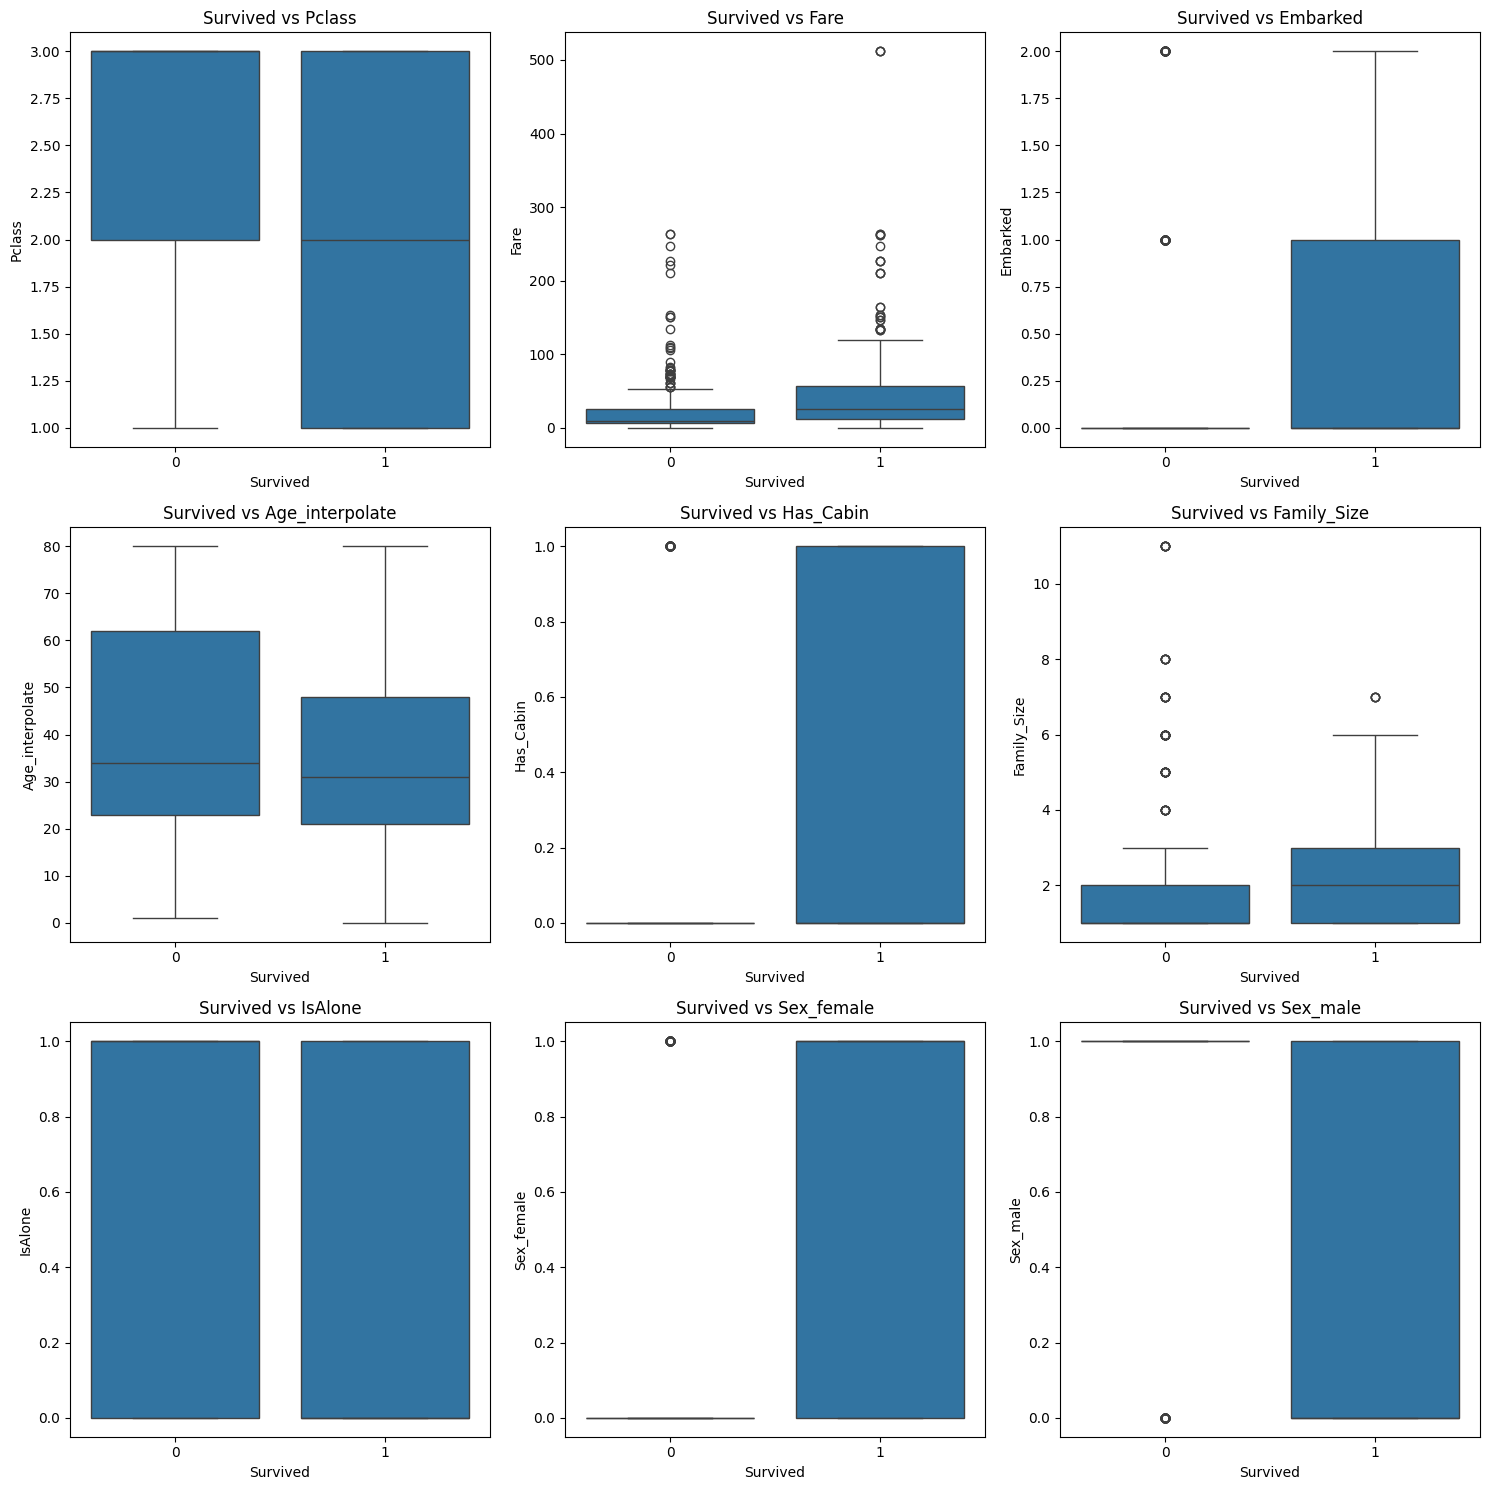

In [ ]:
# Checking for outliers using subplot
X = sorted_df_encoded.drop(['Survived'], axis=1)
y = sorted_df_encoded['Survived']

n_cols = 3
n_rows = math.ceil(len(X.columns) / n_cols)

# Create subplots: one row, number of columns in X
# Fig (figure) is like a canvas whereas axes is the particular areas in that canvas
fig, axes = plt.subplots(n_rows, n_cols, figsize = (15,5*n_rows))
axes = axes.flatten()


'''
📌 Notes on plt.subplots() and axes

fig = the whole canvas (the big figure).

axes = the smaller boxes (subplots) inside the canvas.

How axes behaves:

If you make just one subplot, axes is a single object.

If you make one row with several columns, axes is a 1-D array (a simple list of plots).

If you make multiple rows and columns, axes is a 2-D array (a grid of plots).

You can access plots by row/column index, or flatten the grid into a simple list.
axes.flatten help to treat the 2D array like a 1D array

tight_layout() → adjusts spacing automatically so titles and labels don’t overlap and everything fits neatly.

'''

for i, col in enumerate(X.columns):
    sns.boxplot(x = y, y = col, data = sorted_df_encoded, ax = axes[i])
    axes[i].set_title(f'Survived vs {col}')

'''
(What tight_plot does:)
It automatically adjusts the spacing between subplots so that:

Titles don’t overlap

X/Y labels fit inside the figure

Each subplot has enough breathing room
'''
plt.tight_layout()
plt.show()

In [62]:
sorted_df_encoded

,Survived,Pclass,Fare,Embarked,Age_interpolate,Has_Cabin,Family_Size,IsAlone,Sex_female,Sex_male
803,1,3,8,1,0,0,2,0,0,1
755,1,2,14,0,1,0,3,0,0,1
469,1,3,19,1,1,0,4,0,1,0
644,1,3,19,1,1,0,4,0,1,0
78,1,2,29,0,1,0,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...
859,0,3,7,1,80,0,1,1,0,1
863,0,3,69,0,80,0,11,0,1,0
868,0,3,9,0,80,0,1,1,0,1
878,0,3,7,0,80,0,1,1,0,1


In [63]:
# Since there is a huge burst of outliers for fare, I am going to cap it.
Q1 = sorted_df_encoded['Fare'].quantile(0.25)
Q3 = sorted_df_encoded['Fare'].quantile(0.75)
iqr = Q3 - Q1
lower = Q1 - (1.5 * iqr)
upper = Q3 + (1.5 * iqr)
sorted_df_encoded['Fare'] = np.where(sorted_df_encoded['Fare'] < lower, lower, 
                            np.where(sorted_df_encoded['Fare'] > upper, upper, sorted_df_encoded['Fare']))
sorted_df_encoded

,Survived,Pclass,Fare,Embarked,Age_interpolate,Has_Cabin,Family_Size,IsAlone,Sex_female,Sex_male
803,1,3,8.0,1,0,0,2,0,0,1
755,1,2,14.0,0,1,0,3,0,0,1
469,1,3,19.0,1,1,0,4,0,1,0
644,1,3,19.0,1,1,0,4,0,1,0
78,1,2,29.0,0,1,0,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...
859,0,3,7.0,1,80,0,1,1,0,1
863,0,3,67.0,0,80,0,11,0,1,0
868,0,3,9.0,0,80,0,1,1,0,1
878,0,3,7.0,0,80,0,1,1,0,1


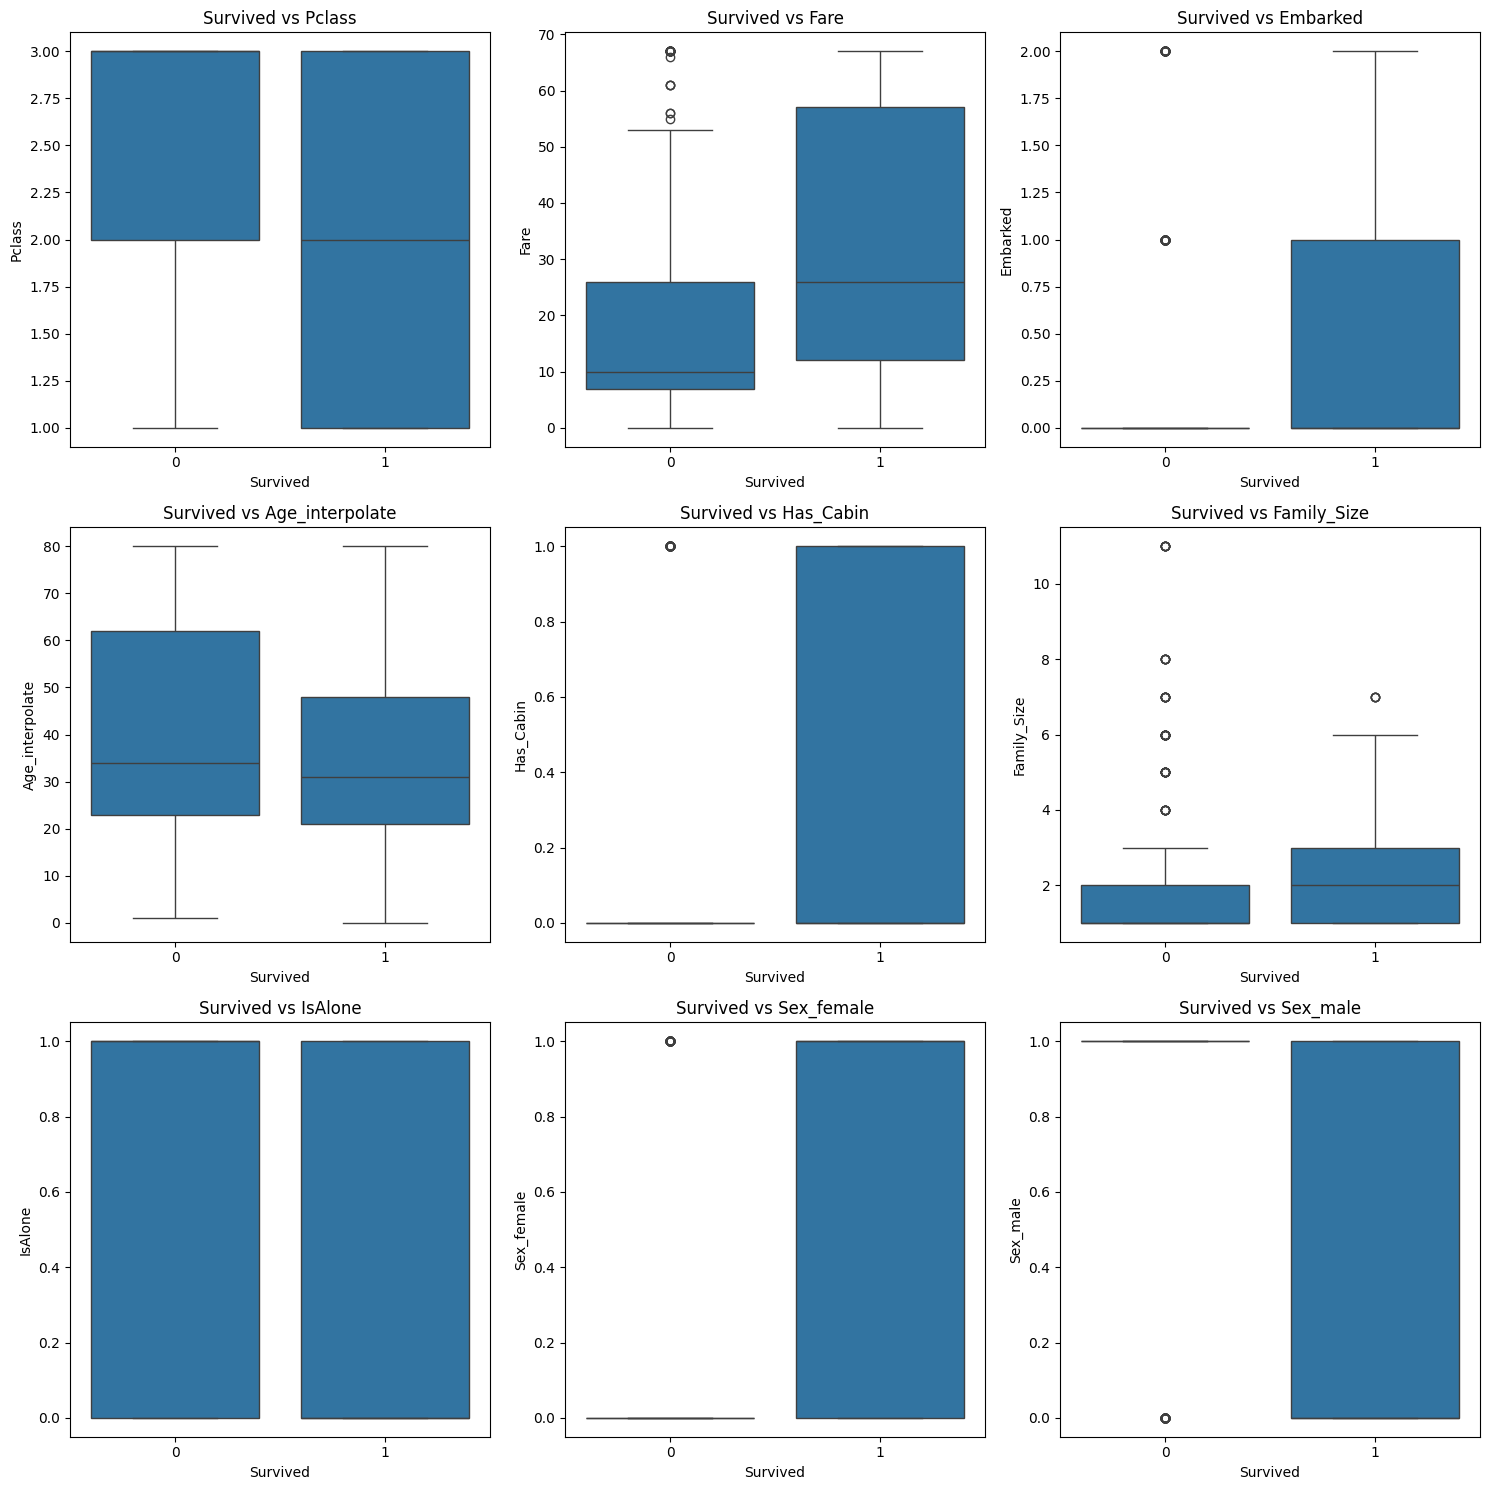

In [64]:
# Checking for outliers using subplot
X = sorted_df_encoded.drop(['Survived'], axis=1)
y = sorted_df_encoded['Survived']

n_cols = 3
n_rows = math.ceil(len(X.columns) / n_cols)

# Create subplots: one row, number of columns in X
# Fig (figure) is like a canvas whereas axes is the particular areas in that canvas
fig, axes = plt.subplots(n_rows, n_cols, figsize = (15,5*n_rows))
axes = axes.flatten()

for i, col in enumerate(X.columns):
    sns.boxplot(x = y, y = col, data = sorted_df_encoded, ax = axes[i])
    axes[i].set_title(f'Survived vs {col}')
    
plt.tight_layout()
plt.show()

## Scaling age and fare for logistic regression model

In [65]:
# Scaling Fare and Age_interpolate for Logistic Regression Model

scaler = StandardScaler()
sorted_df_encoded_scaled = sorted_df_encoded.copy()
sorted_df_encoded_scaled[['Fare', 'Age_interpolate']] = scaler.fit_transform(sorted_df_encoded_scaled[['Fare', 'Age_interpolate']])
sorted_df_encoded_scaled

,Survived,Pclass,Fare,Embarked,Age_interpolate,Has_Cabin,Family_Size,IsAlone,Sex_female,Sex_male
803,1,3,-0.756619,1,-1.659841,0,2,0,0,1
755,1,2,-0.470377,0,-1.618018,0,3,0,0,1
469,1,3,-0.231842,1,-1.618018,0,4,0,1,0
644,1,3,-0.231842,1,-1.618018,0,4,0,1,0
78,1,2,0.245228,0,-1.618018,0,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...
859,0,3,-0.804326,1,1.686034,0,1,1,0,1
863,0,3,2.058094,0,1.686034,0,11,0,1,0
868,0,3,-0.708912,0,1.686034,0,1,1,0,1
878,0,3,-0.804326,0,1.686034,0,1,1,0,1


In [66]:
# Checking correlation for logistic regression dataset

corr_matrix = sorted_df_encoded_scaled.corr()
corr_matrix

,Survived,Pclass,Fare,Embarked,Age_interpolate,Has_Cabin,Family_Size,IsAlone,Sex_female,Sex_male
Survived,1.000000,-0.338481,0.317193,0.111203,-0.115140,0.316912,0.016639,-0.203367,0.543351,-0.543351
Pclass,-0.338481,1.000000,-0.716284,0.040138,-0.035103,-0.725541,0.065997,0.135207,-0.131900,0.131900
Fare,0.317193,-0.716284,1.000000,0.017218,-0.031495,0.617756,0.370061,-0.451755,0.235374,-0.235374
Embarked,0.111203,0.040138,0.017218,1.000000,0.272901,0.020243,-0.082200,0.020660,0.121266,-0.121266
Age_interpolate,-0.115140,-0.035103,-0.031495,0.272901,1.000000,0.005796,-0.176128,0.224670,-0.092036,0.092036
Has_Cabin,0.316912,-0.725541,0.617756,0.020243,0.005796,1.000000,-0.009175,-0.158029,0.140391,-0.140391
Family_Size,0.016639,0.065997,0.370061,-0.082200,-0.176128,-0.009175,1.000000,-0.690922,0.200988,-0.200988
IsAlone,-0.203367,0.135207,-0.451755,0.020660,0.224670,-0.158029,-0.690922,1.000000,-0.303646,0.303646
Sex_female,0.543351,-0.131900,0.235374,0.121266,-0.092036,0.140391,0.200988,-0.303646,1.000000,-1.000000
Sex_male,-0.543351,0.131900,-0.235374,-0.121266,0.092036,-0.140391,-0.200988,0.303646,-1.000000,1.000000


In [67]:
# As Sex_Female/Male and Family_Size/IsAlone show high correlation, getting rid of these to remove multicollinearity issue while implementing
# this in logistic regression

sorted_df_encoded_scaled.drop(['Sex_male', 'Family_Size'], axis = 1, inplace = True)
sorted_df_encoded_scaled 

,Survived,Pclass,Fare,Embarked,Age_interpolate,Has_Cabin,IsAlone,Sex_female
803,1,3,-0.756619,1,-1.659841,0,0,0
755,1,2,-0.470377,0,-1.618018,0,0,0
469,1,3,-0.231842,1,-1.618018,0,0,1
644,1,3,-0.231842,1,-1.618018,0,0,1
78,1,2,0.245228,0,-1.618018,0,0,0
...,...,...,...,...,...,...,...,...
859,0,3,-0.804326,1,1.686034,0,1,0
863,0,3,2.058094,0,1.686034,0,0,1
868,0,3,-0.708912,0,1.686034,0,1,0
878,0,3,-0.804326,0,1.686034,0,1,0


In [68]:
# Dataset for Tree Models
sorted_df_encoded

,Survived,Pclass,Fare,Embarked,Age_interpolate,Has_Cabin,Family_Size,IsAlone,Sex_female,Sex_male
803,1,3,8.0,1,0,0,2,0,0,1
755,1,2,14.0,0,1,0,3,0,0,1
469,1,3,19.0,1,1,0,4,0,1,0
644,1,3,19.0,1,1,0,4,0,1,0
78,1,2,29.0,0,1,0,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...
859,0,3,7.0,1,80,0,1,1,0,1
863,0,3,67.0,0,80,0,11,0,1,0
868,0,3,9.0,0,80,0,1,1,0,1
878,0,3,7.0,0,80,0,1,1,0,1


In [69]:
# Dataset for Logistic Regression
sorted_df_encoded_scaled

,Survived,Pclass,Fare,Embarked,Age_interpolate,Has_Cabin,IsAlone,Sex_female
803,1,3,-0.756619,1,-1.659841,0,0,0
755,1,2,-0.470377,0,-1.618018,0,0,0
469,1,3,-0.231842,1,-1.618018,0,0,1
644,1,3,-0.231842,1,-1.618018,0,0,1
78,1,2,0.245228,0,-1.618018,0,0,0
...,...,...,...,...,...,...,...,...
859,0,3,-0.804326,1,1.686034,0,1,0
863,0,3,2.058094,0,1.686034,0,0,1
868,0,3,-0.708912,0,1.686034,0,1,0
878,0,3,-0.804326,0,1.686034,0,1,0


In [70]:
# Exporting both datasets
sorted_df_encoded.to_csv('./data/titanic_cleaned_data_tree_models.csv', index=False)
sorted_df_encoded_scaled.to_csv('./data/titanic_cleaned_data_reg_model.csv', index=False)